In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [63]:
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import seaborn as sns

In [65]:
# Cargar datos
df = pd.read_csv('C:/Users/DIEGO ALEJANDRO RAMI/Documents/Unad/UNAD semestre 3/Analisis de datos/Traea 4/archive (3)/Mall_Customers.csv')

In [67]:
# 1. Verificar valores faltantes
print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [69]:
# Mostrar las primeras filas para ver qué columnas usar
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [113]:
# las columnas que usaremos 'Annual Income (k$)' y 'Spending Score (1-100)'
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

In [115]:
# Aplicar linkage para clustering jerárquico
Z = linkage(X, method='ward')

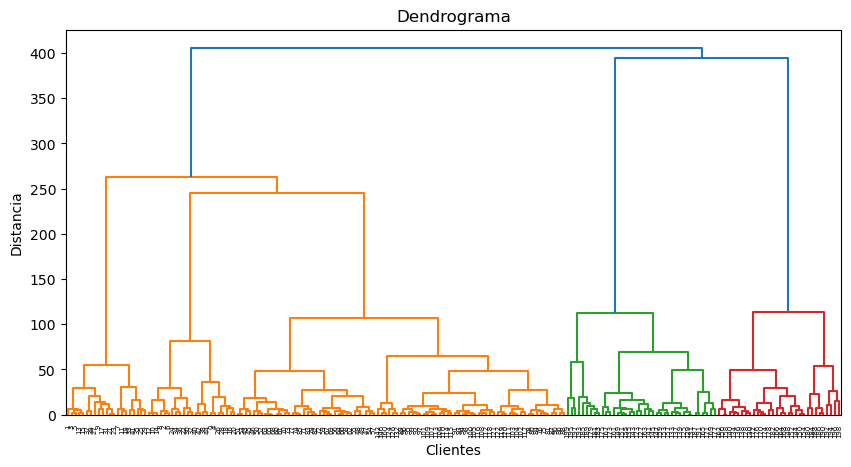

In [117]:
# Visualizar el dendrograma
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Dendrograma')
plt.xlabel('Clientes')
plt.ylabel('Distancia')
plt.show()

In [119]:
# Obtener los clusters (por ejemplo, 5 clusters)
clusters = fcluster(Z, t=5, criterion='maxclust')
df['Cluster'] = clusters

In [121]:
print(df[['Annual Income (k$)', 'Spending Score (1-100)','Cluster']].head())

   Annual Income (k$)  Spending Score (1-100)  Cluster
0                  15                      39        2
1                  15                      81        1
2                  16                       6        2
3                  16                      77        1
4                  17                      40        2


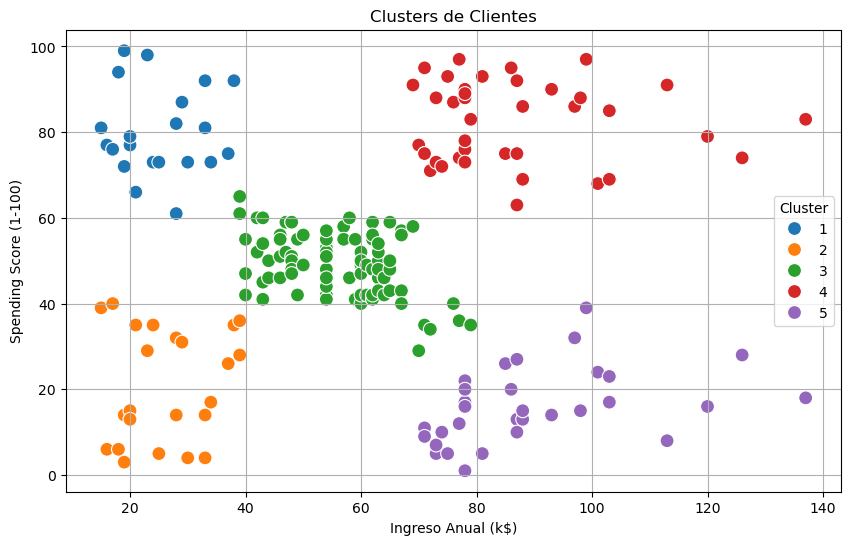

In [123]:
# Crear un gráfico de dispersión con los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Annual Income (k$)', 
    y='Spending Score (1-100)', 
    hue='Cluster', 
    palette='tab10', 
    data=df,
    s=100  # tamaño de los puntos
)

plt.title('Clusters de Clientes')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [125]:
# Evaluar el clustering con Silhouette y Calinski-Harabasz
sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)

print(f"Coeficiente de Silhouette: {sil_score:.3f}")
print(f"Índice de Calinski-Harabasz: {calinski_score:.3f}")

Coeficiente de Silhouette: 0.553
Índice de Calinski-Harabasz: 243.071


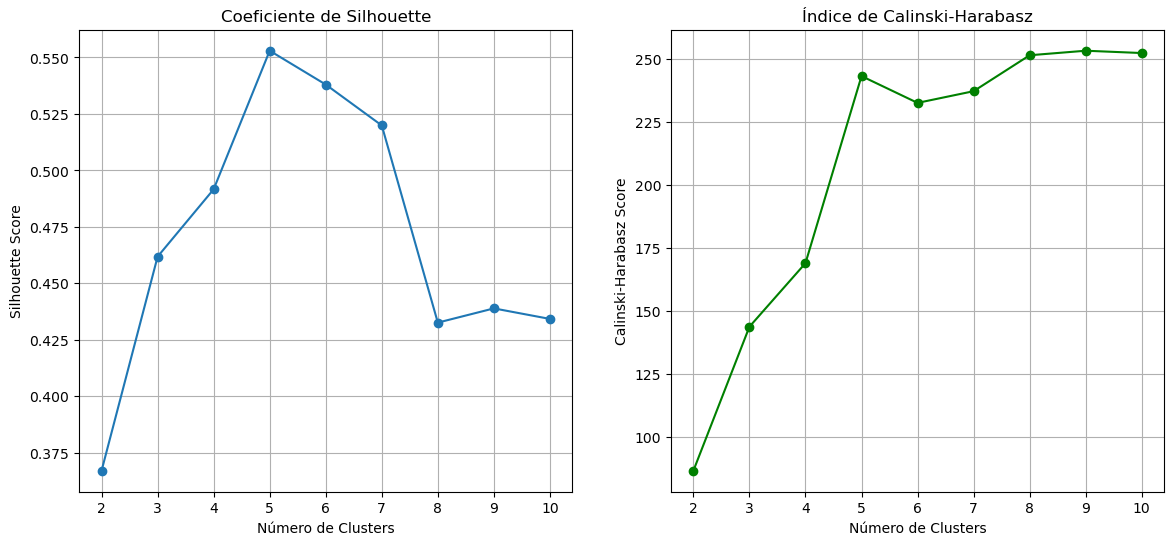

In [127]:
silhouette_scores = []
calinski_scores = []
cluster_range = range(2, 11)  # Probar de 2 a 10 clusters

# Usamos linkage solo una vez
Z = linkage(X, method='ward')

for k in cluster_range:
    labels = fcluster(Z, k, criterion='maxclust')
    sil_score = silhouette_score(X, labels)
    cal_score = calinski_harabasz_score(X, labels)
    silhouette_scores.append(sil_score)
    calinski_scores.append(cal_score)

# Graficar los resultados
plt.figure(figsize=(14, 6))

# Gráfico de Silhouette
plt.subplot(1, 2, 1)
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Coeficiente de Silhouette')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)

# Gráfico de Calinski-Harabasz
plt.subplot(1, 2, 2)
plt.plot(cluster_range, calinski_scores, marker='o', color='green')
plt.title('Índice de Calinski-Harabasz')
plt.xlabel('Número de Clusters')
plt.ylabel('Calinski-Harabasz Score')
plt.grid(True)